In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import os

ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv")
merged_df = pd.merge(ride_df, city_df, how='inner', on='city')
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [3]:
#Average Fare Per City
average_fare = merged_df.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})
#Total Number of Rides Per City
total_rides = merged_df.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})
#Total Drivers
total_drivers = merged_df[["city", "driver_count"]].drop_duplicates("city")
#City Type
city_type = merged_df[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

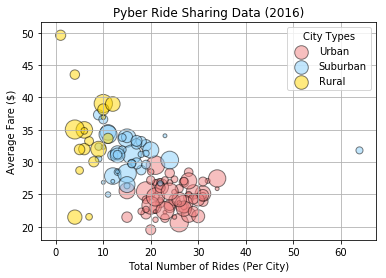

In [13]:
#Bubble Plot Data
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

#Bubble Plot
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='lightcoral', s=final_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightskyblue',s=final_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=final_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)
plt.show()

In [4]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
bytype = city_df.groupby('type').sum()
bytype['city'] = ['Rural','Suburban','Urban']
bytype

,driver_count,city
type,,
Rural,104,Rural
Suburban,638,Suburban
Urban,2607,Urban


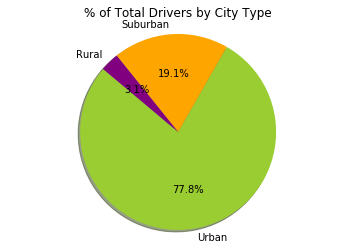

In [16]:
types = city_df['type'].unique()
driver_count = [2607,638,104]
colors = ["yellowgreen", "orange","purple"]
explode = (0,0,0)

plt.pie(driver_count, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.show()

In [8]:
byfare = merged_df[['type','fare']].groupby('type').sum()
byfare['city'] = ['Rural','Suburban','Urban']
byfare

,fare,city
type,,
Rural,4255.09,Rural
Suburban,20335.69,Suburban
Urban,40078.34,Urban


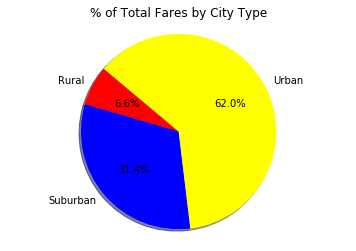

In [14]:
types = byfare['city'].unique()
fares = [4255.09,20335.69,40078.34]
colors = ["red", "blue","yellow"]
explode = (0,0,0)

plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

In [10]:
byrides = merged_df[['city','type','fare']].groupby(['city','type']).count()
byrides = byrides.groupby('type').sum()
byrides

,fare
type,
Rural,125
Suburban,657
Urban,1625


In [11]:
byrides['fare'].unique()

array([ 125,  657, 1625], dtype=int64)

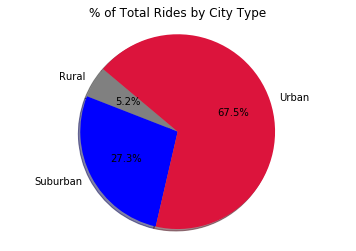

In [15]:
types = ['Rural','Suburban','Urban']
fares = [125,657,1625]
colors = ["gray", "blue","crimson"]
explode = (0,0,0)

plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

# Conclusions

1. Urban areas were the ones with more rides, fares and total drivers
2. Rural areas were the ones with less rides,  fares and total drivers
3. The average ride fare was lower for urban areas than for suburban or rural areas